In [1]:
import warnings
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings('ignore')

In [2]:
import os
def load_test_data():
    directory = os.path.dirname(os.path.realpath('COMP237_GroupProject'))
    directory = os.path.join(directory,"TestData")
    files = [f for f in os.listdir(directory)]

    # Create dataframe
    # Columns: COMMENT_ID, AUTHOR, DATE, CONTENT, TAG
    result = pd.concat(
        (pd.read_csv(os.path.join(directory, f)) for f in files))

    # Content and class matter, keep two columns only
    result = result[['CONTENT', 'CLASS']]
    return result


def load_train_data():
    directory = os.path.dirname(os.path.realpath('COMP237_GroupProject'))
    directory = os.path.join(directory, "TrainData")
    files = [f for f in os.listdir(directory)]

    # Create dataframe
    # Columns: COMMENT_ID, AUTHOR, DATE, CONTENT, TAG
    result = pd.concat(
        (pd.read_csv(os.path.join(directory, f)) for f in files))

    # Content and class matter, keep two columns only
    result = result[['CONTENT', 'CLASS']]
    return result





# Load train and test data

In [3]:
data = load_train_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  350 non-null    object
 1   CLASS    350 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [4]:
test_data = load_test_data()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1606 non-null   object
 1   CLASS    1606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


# Tokenlization and preprocess

In [5]:
from nltk import WordNetLemmatizer, PorterStemmer, SnowballStemmer, LancasterStemmer
def Lemmatizer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([WordNetLemmatizer().lemmatize(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


def Porter_Stemmer(data):
    tmp = data.copy()
    stemmer = PorterStemmer()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([PorterStemmer().stem(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


def Snowball_Stemmer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x:  ''.join([SnowballStemmer(language='english').stem(x)for x in x['CONTENT']]), axis=1)
    return tmp


def Lancaster_Stemmer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([LancasterStemmer().stem(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


## Preprocess with different stemmer

In [6]:
data_lemmatizer = Lemmatizer(data)
data_porter = Porter_Stemmer(data)
data_snowball = Snowball_Stemmer(data)
data_lancaster = Lancaster_Stemmer(data)

TEST_SIZE = 0.25
RANDOM_SEED= 420


# Lemmatize

In [11]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)
x_lemmatizer_train = count_vectorizer.fit_transform(
    data_lemmatizer['CONTENT'].to_numpy())
y_lemmatizer_train = data_lemmatizer['CLASS'].to_numpy()

x_lemmatizer_test = count_vectorizer.transform(test_data['CONTENT'].to_numpy())
y_lemmatizer_test = test_data['CLASS'].to_numpy()

tfidf_lemm = TfidfTransformer()
train_lemmatizer_tfidf = tfidf_lemm.fit_transform(x_lemmatizer_train)
test_lemmatizer_tfidf = tfidf_lemm.transform(x_lemmatizer_test)
lemmatizer_classifier = MultinomialNB().fit(
    train_lemmatizer_tfidf, y_lemmatizer_train)


# Porter

In [12]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)
data_porter_vectorized = count_vectorizer.fit_transform(
    data_porter['CONTENT'].to_numpy())

x_porter_train = data_porter_vectorized
x_porter_test = count_vectorizer.transform(test_data['CONTENT'].to_numpy())
y_porter_train = data_porter['CLASS'].to_numpy()
y_porter_test = test_data['CLASS'].to_numpy()

tfidf_porter = TfidfTransformer()
train_porter_tfidf = tfidf_porter.fit_transform(x_porter_train)
test_porter_tfidf = tfidf_porter.transform(x_porter_test)
porter_classifier = MultinomialNB().fit(
    train_porter_tfidf, y_porter_train)


# Snowball

In [13]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)
data_snowball_vectorized = count_vectorizer.fit_transform(
    data_snowball['CONTENT'].to_numpy())

x_snowball_train = data_snowball_vectorized
x_snowball_test = count_vectorizer.transform(test_data['CONTENT'].to_numpy())
y_snowball_train = data_porter['CLASS'].to_numpy()
y_snowball_test = test_data['CLASS'].to_numpy()

tfidf_snowball = TfidfTransformer()
train_snowball_tfidf = tfidf_snowball.fit_transform(x_snowball_train)
test_snowball_tfidf = tfidf_porter.transform(x_snowball_test)
snowball_classifier = MultinomialNB().fit(
    train_snowball_tfidf, y_snowball_train)


# Lancaster

In [14]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)
data_lancaster_vectorized = count_vectorizer.fit_transform(
    data_lancaster['CONTENT'].to_numpy())

x_lancaster_train = data_lancaster_vectorized
x_lancaster_test = count_vectorizer.transform(test_data['CONTENT'].to_numpy())
y_lancaster_train = data_porter['CLASS'].to_numpy()
y_lancaster_test = test_data['CLASS'].to_numpy()

tfidf_lancaster= TfidfTransformer()
train_lancaster_tfidf = tfidf_lancaster.fit_transform(x_lancaster_train)
test_lancaster_tfidf = tfidf_lancaster.fit_transform(x_lancaster_test)
lancaster_classifier = MultinomialNB().fit(
    train_lancaster_tfidf, y_lancaster_train)



# Prediction and result

In [16]:
test_lemmatizer_tfidf = tfidf_lemm.fit_transform(x_lemmatizer_test)
lemmatizer_predictions = lemmatizer_classifier.predict(test_lemmatizer_tfidf)

test_porter_tfidf = tfidf_porter.fit_transform(x_porter_test)
porter_predictions = porter_classifier.predict(test_porter_tfidf)

test_snowball_tfidf = tfidf_snowball.fit_transform(x_snowball_test)
snowball_predictions = snowball_classifier.predict(test_snowball_tfidf)

test_lancaster_tfidf = tfidf_lancaster.fit_transform(x_lancaster_test)
lancaster_predictions = lancaster_classifier.predict(test_lancaster_tfidf)


## Mean accuacy

In [17]:
from sklearn.model_selection import cross_val_score
cv_value=10
mean_accuacy = {'Lemmatizer': [cross_val_score(lemmatizer_classifier, x_lemmatizer_train,
                                              y_lemmatizer_train, cv=cv_value).mean()],
                'Porter': [cross_val_score(porter_classifier, x_porter_train,
                                          y_porter_train, cv=cv_value).mean()],
                'Snowball': [cross_val_score(snowball_classifier, x_snowball_train,
                                            y_snowball_train, cv=cv_value).mean()],
                'Lancaster': [cross_val_score(lancaster_classifier, x_lancaster_train,
                                             y_lancaster_train, cv=cv_value).mean()]}
pd.DataFrame(data=mean_accuacy)

,Lemmatizer,Porter,Snowball,Lancaster
0,0.88,0.88,0.88,0.88


### Confusion matrix

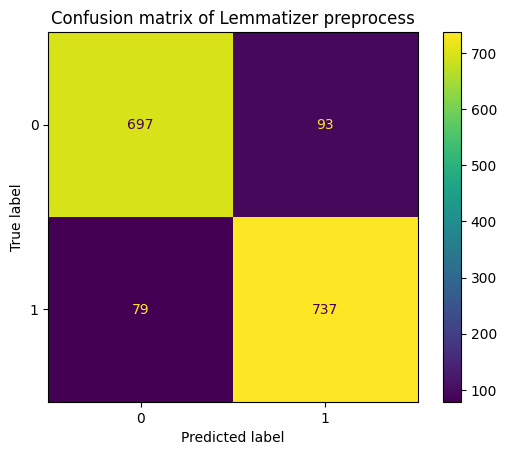

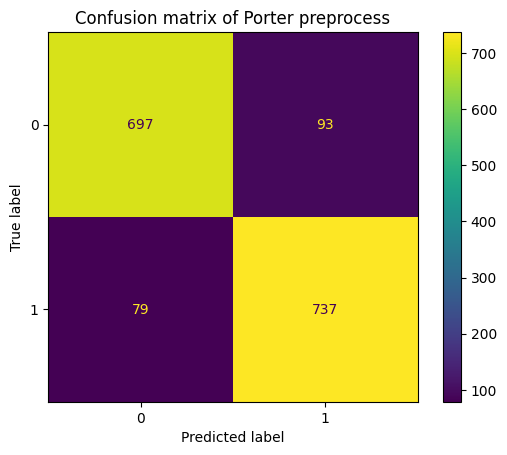

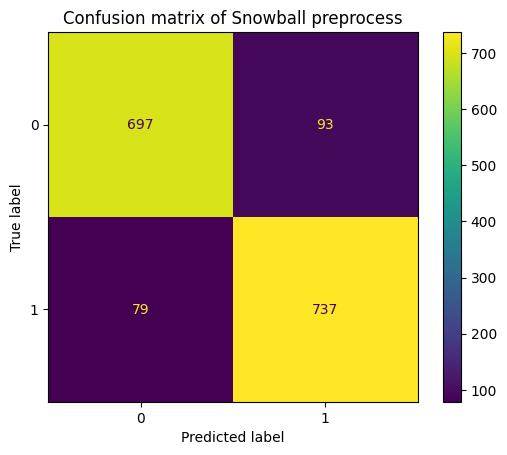

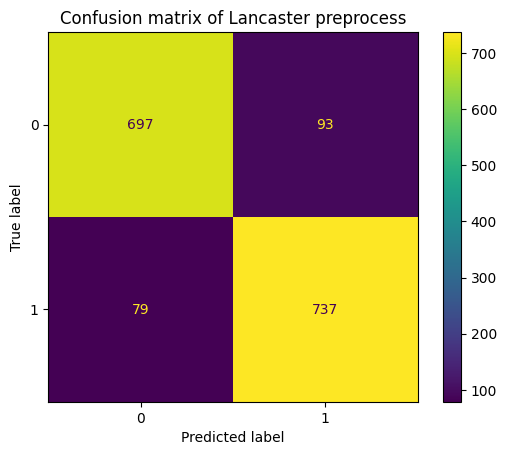

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cf_lemmatizer = confusion_matrix(lemmatizer_predictions, y_lemmatizer_test)
disp_lemmatizer = ConfusionMatrixDisplay(cf_lemmatizer)
disp_lemmatizer.plot()
plt.title('Confusion matrix of Lemmatizer preprocess')



cf_porter = confusion_matrix(porter_predictions, y_porter_test)
disp_porter = ConfusionMatrixDisplay(cf_porter)
disp_porter.plot()
plt.title('Confusion matrix of Porter preprocess')


cf_snowball = confusion_matrix(snowball_predictions, y_snowball_test)
disp_snowball = ConfusionMatrixDisplay(cf_snowball)
disp_porter.plot()
plt.title('Confusion matrix of Snowball preprocess')

cf_lancaster = confusion_matrix(lancaster_predictions, y_lancaster_test)
disp_lancaster = ConfusionMatrixDisplay(cf_lancaster)
disp_porter.plot()
plt.title('Confusion matrix of Lancaster preprocess')
plt.show()
